In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
dataframe = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataframe.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
data=dataframe.drop(['Outcome'],axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
features = list(data.columns.values) #get col names
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
y=target=dataframe.Outcome

### 1. Principal Component Analysis

In [7]:
sumry = np.round(data.describe().transpose(),decimals=2)
print("Summary Statistics:\n",sumry.drop(['25%','50%','75%'],axis=1))

Summary Statistics:
                           count    mean     std    min     max
Pregnancies               768.0    3.85    3.37   0.00   17.00
Glucose                   768.0  120.89   31.97   0.00  199.00
BloodPressure             768.0   69.11   19.36   0.00  122.00
SkinThickness             768.0   20.54   15.95   0.00   99.00
Insulin                   768.0   79.80  115.24   0.00  846.00
BMI                       768.0   31.99    7.88   0.00   67.10
DiabetesPedigreeFunction  768.0    0.47    0.33   0.08    2.42
Age                       768.0   33.24   11.76  21.00   81.00


Frequency Distributions:



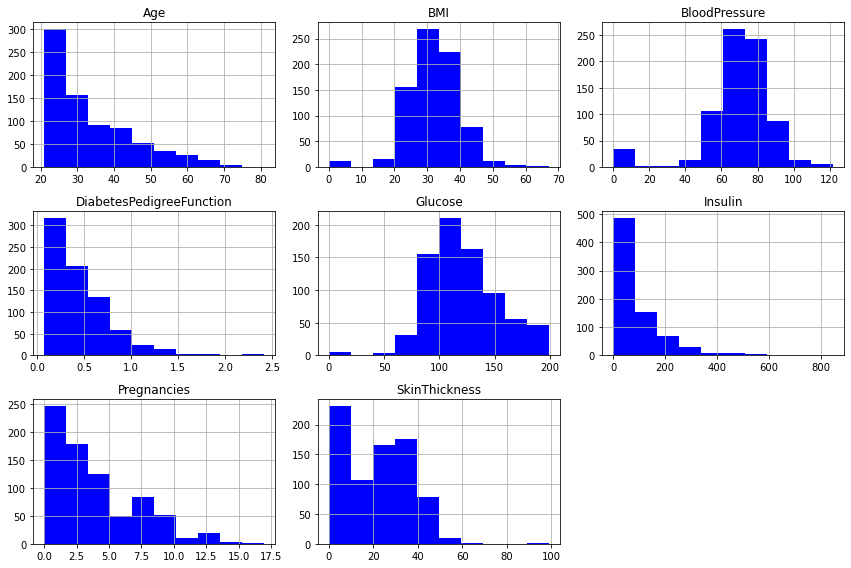

In [8]:
# (2) Histograms
print("Frequency Distributions:\n")
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

In [9]:
# (3) correlation matrix (data is standardized by the formula)
colnames = features
corm = data.corr().values

print('Corelation Matrix:')
print(pd.DataFrame(np.round(corm,decimals=2),index=colnames,columns=colnames),'\n')
#pd.DataFrame(corm).to_csv('CorrelationMatrix.csv')

Corelation Matrix:
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  
Pregnancies                 -0.07  0.02                     -0.03  0.54  
Glucose                      0.33  0.22                      0.14  0.26  
BloodPressure                0.09  0.2

In [10]:
# Check for significant correlations for Dimension Reduction to be fruitful
# Standardization not needed - should be raw data like other stats test.
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(data)
print("chi_square_value:",chi_square_value, "\nP-value:", p_value)
if (p_value <0.05): print('CONCLUSION: REJECT THE NULL - Correlations EXISTS')

chi_square_value: 956.1845305269898 
P-value: 1.2749976140864418e-183
CONCLUSION: REJECT THE NULL - Correlations EXISTS


In [11]:
# Check for sampling adequacy

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(data)
print("\nKaiser-Meyer-Olkin:", kmo_model)
if (kmo_model > 0.5): print("CONCLUSION: Sampling is Adequate")


Kaiser-Meyer-Olkin: 0.5883561051209576
CONCLUSION: Sampling is Adequate


In [12]:
# (4) Standardized the data
data_std = StandardScaler().fit_transform(data) #mean=0; var=1)$

In [13]:
# Run the PCA Method
n_components = int(len(features)*(1/2))
pca = PCA(n_components).fit(data_std)

In [14]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))

In [15]:
# get the eigenvectors
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigenvectors,index=colnames,columns=PCs),'\n')

# PC1 = Income*0.312 + Education*0.237 + Age*0.484 .... + Credit Cards*-0.123


Eigenvectors (Linear Coefficients):
                            PC1    PC2    PC3    PC4
Pregnancies               0.128  0.594 -0.013  0.081
Glucose                   0.393  0.174  0.468 -0.404
BloodPressure             0.360  0.184 -0.535  0.056
SkinThickness             0.440 -0.332 -0.238  0.038
Insulin                   0.435 -0.251  0.337 -0.350
BMI                       0.452 -0.101 -0.362  0.054
DiabetesPedigreeFunction  0.271 -0.122  0.433  0.834
Age                       0.198  0.621  0.075  0.071 



In [16]:
# get eigenvalues to calculate the loadings
eigenvalues = pca.explained_variance_

print('Loading Matrix:'); 
loadings= np.sqrt(eigenvalues)*eigenvectors
print(pd.DataFrame(np.round(loadings,decimals=4),index=colnames,columns=PCs),'\n')
pd.DataFrame(loadings).to_csv("Loadings.csv")

Loading Matrix:
                             PC1     PC2     PC3     PC4
Pregnancies               0.1854  0.7821 -0.0132  0.0758
Glucose                   0.5691  0.2291  0.4752 -0.3783
BloodPressure             0.5213  0.2423 -0.5432  0.0524
SkinThickness             0.6372 -0.4371 -0.2417  0.0356
Insulin                   0.6299 -0.3305  0.3422 -0.3277
BMI                       0.6546 -0.1330 -0.3676  0.0506
DiabetesPedigreeFunction  0.3924 -0.1606  0.4397  0.7809
Age                       0.2867  0.8176  0.0762  0.0665 



In [17]:
var_expln= np.round(pca.explained_variance_ratio_ * 100,decimals=2)
eigval = -np.sort(-eigenvalues) #'-'=descending

npc = 6 # display
print("Eigenvalues                      :",np.round(eigval[0:npc],decimals=3))
print("Eigenvalues (%Explained_Variance):",var_expln[0:npc])
print("Eigenvalues (%Cumulative)        :",np.cumsum(var_expln[0:npc]))

Eigenvalues                      : [2.097 1.733 1.031 0.877]
Eigenvalues (%Explained_Variance): [26.18 21.64 12.87 10.94]
Eigenvalues (%Cumulative)        : [26.18 47.82 60.69 71.63]


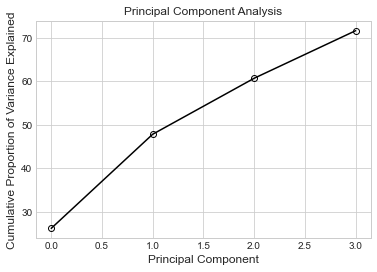

In [18]:
# pareto chart
plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(var_expln)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

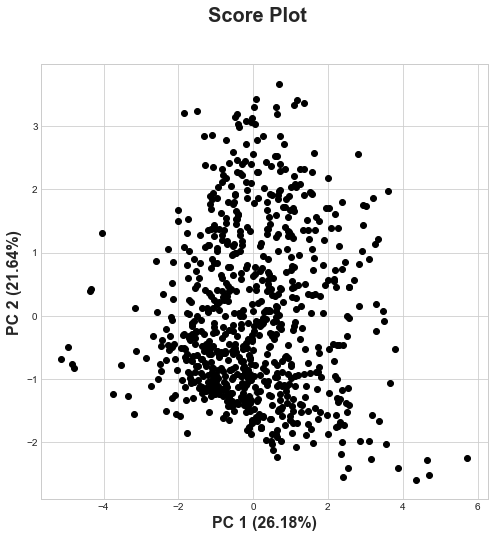

In [19]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
fig = plt.figure(figsize=(8,8))
fig.suptitle('Score Plot',fontsize=20,weight='bold')
plt.xlabel('PC 1 ('+str(var_expln[0])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC 2 ('+str(var_expln[1])+'%)',fontsize=16,weight='bold')
new_reduced_dataset = pca.transform(data_std) # used for downstream analytics
plt.scatter(new_reduced_dataset[:,0],new_reduced_dataset[:,1],color='black')
plt.show(); fig.savefig('ScorePlot.jpg')

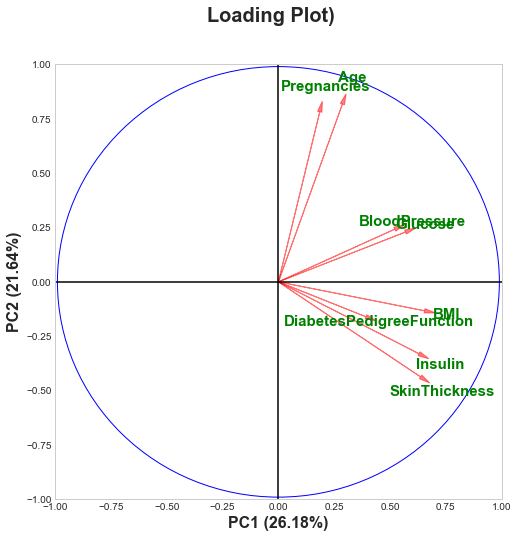

In [20]:
# Loadings Plot
p1=1; p2=2
coeff = loadings[:,p1-1:p2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plt.xlabel('PC'+str(p1)+' ('+str(var_expln[p1-1])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC'+str(p2)+' ('+str(var_expln[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='g',ha='center',va='center',weight='bold')

circle = plt.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid();
plt.show(); fig.savefig('Loadings.jpg')

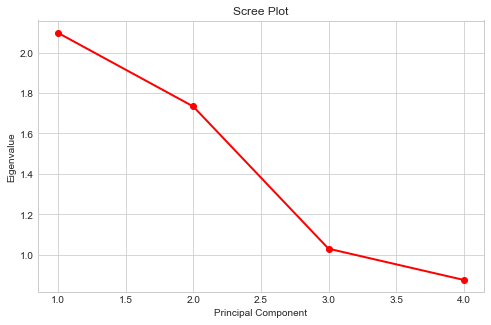

In [21]:
## scree plot, eigval from covar
num_vars= n_components
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [22]:
# compute the communilaties for the selected number of PC
no_pc = n_components
loadings_sq = loadings*loadings #square matrix
communality = np.sum(loadings_sq[:,0:no_pc],axis=1).tolist()
print("\n** Communalities for",no_pc,"PCs):")
print(pd.DataFrame(communality,index=colnames),'\n')


** Communalities for 4 PCs):
                                 0
Pregnancies               0.651915
Glucose                   0.745273
BloodPressure             0.628313
SkinThickness             0.656735
Insulin                   0.730515
BMI                       0.583790
DiabetesPedigreeFunction  0.982884
Age                       0.760930 



## 2. Predictive Modelling With PCA Components

### 2.1 Logistic Regression

In [23]:
pca_features = pca.fit_transform(data_std)
X=pca_features

In [24]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01,class_weight={0:1, 1:2}, penalty='l2').fit(X_train, y_train)
print("Training logistic regression with PCA set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test logistic regression with PCA set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training logistic regression with PCA set score: 0.727
Test logistic regression with PCA set score: 0.688


In [26]:
logreg.intercept_.T

array([-0.03458163])

In [27]:
logreg.coef_.T

array([[ 0.48509233],
       [ 0.26034935],
       [ 0.26147823],
       [-0.0947912 ]])

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       167
           1       0.54      0.70      0.61        89

    accuracy                           0.69       256
   macro avg       0.67      0.69      0.67       256
weighted avg       0.71      0.69      0.69       256



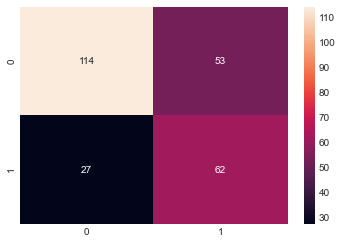

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  

logreg_pred = logreg.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, fmt="d"))  
print(classification_report(y_test, logreg_pred)) 

### 2.2 KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
print("Training KNN Classifier with PCA set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test KNN Classifier with PCA set score: {:.3f}".format(knn.score(X_test, y_test)))

Training KNN Classifier with PCA set score: 0.785
Test KNN Classifier with PCA set score: 0.719


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       167
           1       0.62      0.51      0.56        89

    accuracy                           0.72       256
   macro avg       0.69      0.67      0.67       256
weighted avg       0.71      0.72      0.71       256



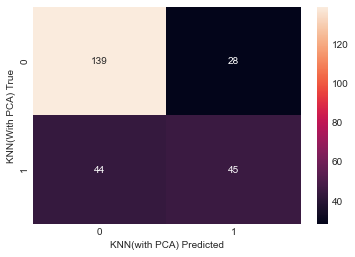

In [30]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
knn_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
sns.heatmap(pd.crosstab(y_test, knn_pred, rownames=['KNN(With PCA) True'], colnames=['KNN(with PCA) Predicted'], margins=False), annot=True, fmt='d')
print(classification_report(y_test,knn_pred))

### 2.3 Naïve Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

# Initiating the Gaussian Classifier
mod = GaussianNB()
# Training your model 
mod.fit(X_train, y_train)
print("Training Naive Bayes set with PCA score: {:.3f}".format(mod.score(X_train, y_train)))
print("Test Naive Bayes set with PCA score: {:.3f}".format(mod.score(X_test, y_test)))

Training Naive Bayes set with PCA score: 0.738
Test Naive Bayes set with PCA score: 0.719


In [32]:
# Predicting Outcome 
mod_pred = mod.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       167
           1       0.62      0.48      0.54        89

    accuracy                           0.72       256
   macro avg       0.69      0.66      0.67       256
weighted avg       0.71      0.72      0.71       256



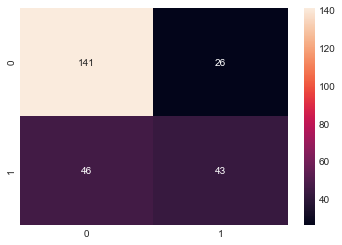

In [33]:
# Confusion Matrix
mod_pred = mod.predict(X_test)
sns.heatmap(confusion_matrix(y_test, mod_pred),annot=True, fmt='d')
print(classification_report(y_test, mod_pred)) 

## 3. Predictive Modelling Without PCA Components

### 3.1 Logistic Regression

In [34]:
X1=data_std
X1

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [35]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=1/3,random_state=42, stratify=y)

In [36]:
logreg2 = LogisticRegression(C=0.01,class_weight={0:1, 1:2}, penalty='l2').fit(X1_train, y_train)
print("Training logistic regression without PCA set score: {:.3f}".format(logreg2.score(X1_train, y_train)))
print("Test logistic regression without PCA set score: {:.3f}".format(logreg2.score(X1_test, y_test)))

Training logistic regression without PCA set score: 0.740
Test logistic regression without PCA set score: 0.758


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       167
           1       0.62      0.79      0.69        89

    accuracy                           0.76       256
   macro avg       0.74      0.76      0.75       256
weighted avg       0.78      0.76      0.76       256



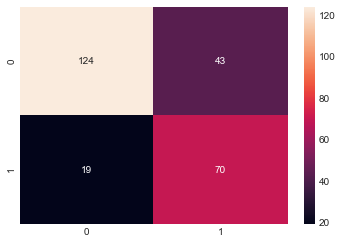

In [37]:
logreg2_pred = logreg2.predict(X1_test)
print(sns.heatmap(confusion_matrix(y_test, logreg2_pred), annot=True, fmt="d"))  
print(classification_report(y_test, logreg2_pred))

### 3.2 KNN Classifier

In [38]:
#Setup a knn classifier with k neighbors
knn2 = KNeighborsClassifier(11)
knn2.fit(X1_train,y_train)
print("Training KNN Classifier without PCA set score: {:.3f}".format(knn2.score(X1_train, y_train)))
print("Test KNN Classifier without PCA set score: {:.3f}".format(knn2.score(X1_test, y_test)))

Training KNN Classifier without PCA set score: 0.783
Test KNN Classifier without PCA set score: 0.770


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       167
           1       0.71      0.56      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



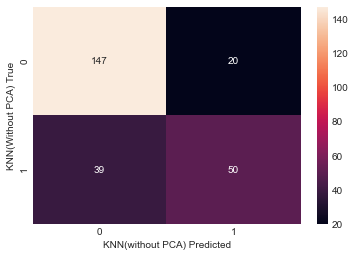

In [39]:
#let us get the predictions using the classifier we had fit above
knn2_pred = knn2.predict(X1_test)
#confusion_matrix(y_test,y_pred)
sns.heatmap(pd.crosstab(y_test, knn2_pred, rownames=['KNN(Without PCA) True'], colnames=['KNN(without PCA) Predicted'], margins=False), annot=True, fmt='d')
print(classification_report(y_test,knn2_pred))

### 3.3 Naïve Bayes Classifier

In [40]:
# Initiating the Gaussian Classifier
mod2 = GaussianNB()
# Training your model 
mod2.fit(X1_train, y_train)

print("Training Naive Bayes set without PCA score: {:.3f}".format(mod2.score(X1_train, y_train)))
print("Test Naive Bayes set without PCA score: {:.3f}".format(mod2.score(X1_test, y_test)))

Training Naive Bayes set without PCA score: 0.779
Test Naive Bayes set without PCA score: 0.738


In [41]:
# Predicting Outcome 
mod2_pred = mod2.predict(X1_test)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       167
           1       0.62      0.64      0.63        89

    accuracy                           0.74       256
   macro avg       0.71      0.72      0.71       256
weighted avg       0.74      0.74      0.74       256



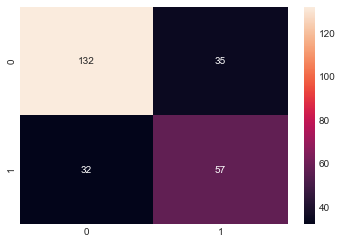

In [42]:
# Confusion Matrix
mod2_pred = mod2.predict(X1_test)
sns.heatmap(confusion_matrix(y_test, mod2_pred),annot=True, fmt='d')
print(classification_report(y_test, mod2_pred)) 

## 4. Model Performance Comparison

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# You can compare the performance of multiple models in one ROC chart. Wrtie your own codes in the cells below.
# Instantiate the classfiers and make a list
classifiers1 = [('Logistic Regression (with PCA)', logreg), ('Naive Bayes Classifier(with PCA)',mod), ('KNN Classifier(with PCA)',knn)]
classifiers2 = [('Logistic Regression (without PCA)', logreg2), ('Naive Bayes Classifier(without PCA)',mod2), ('KNN Classifier(without PCA)',knn2)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for name, cls in classifiers1:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)    
    result_table = result_table.append({'classifiers':name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
for name, cls in classifiers2:
    model = cls.fit(X1_train, y_train)
    yproba = model.predict_proba(X1_test)[::,1]    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)    
    result_table = result_table.append({'classifiers':name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

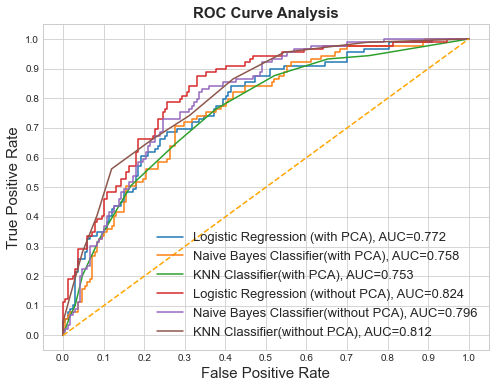

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The curve should be upward facing close to 1 on both scales, as far away from horizontal line that indicates randomness in prediction. 

Logistic Regression (with PCA): mean-0.720113, std-0.059639
Naive Bayes Classifier(with PCA): mean-0.726504, std-0.049611
KNN Classifier(with PCA): mean-0.718780, std-0.059794
Logistic Regression (without PCA): mean-0.740926, std-0.048896
Naive Bayes Classifier(without PCA): mean-0.755178, std-0.042766
KNN Classifier(without PCA): mean-0.747386, std-0.053695


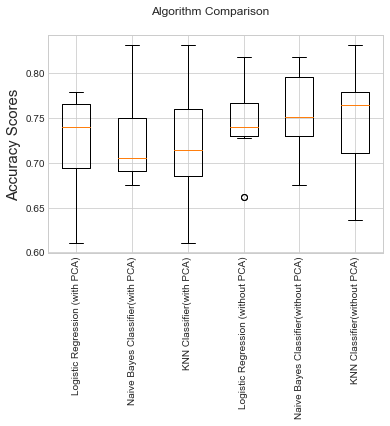

In [45]:
from sklearn import model_selection

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed=8
for name, model in classifiers1:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: mean-%f, std-%f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

for name, model in classifiers2:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X1, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: mean-%f, std-%f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("Accuracy Scores", fontsize=15)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

We are looking at mean and standard deviation of cross-validation scores of each model.<br>
Using PCA leads to loss of information as number of original features is already small.<br>
Boxplots shows variance in predictive power of various models. <br>
KNN shows highest variance as being lazy learner, it overfits and memorises specific instances.

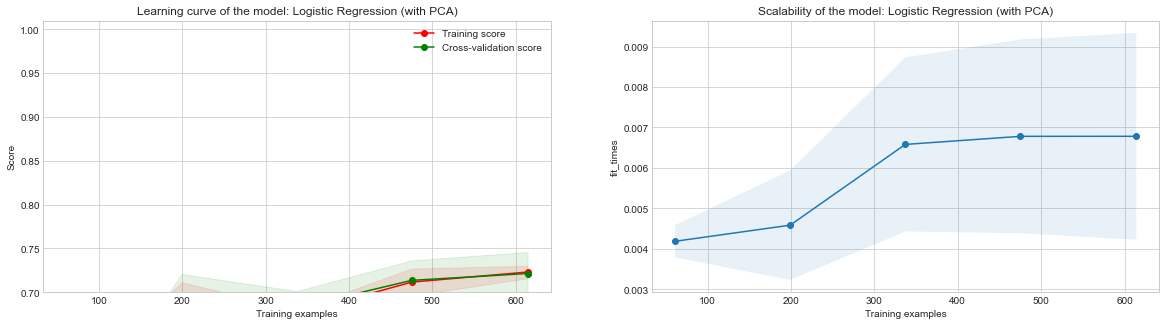

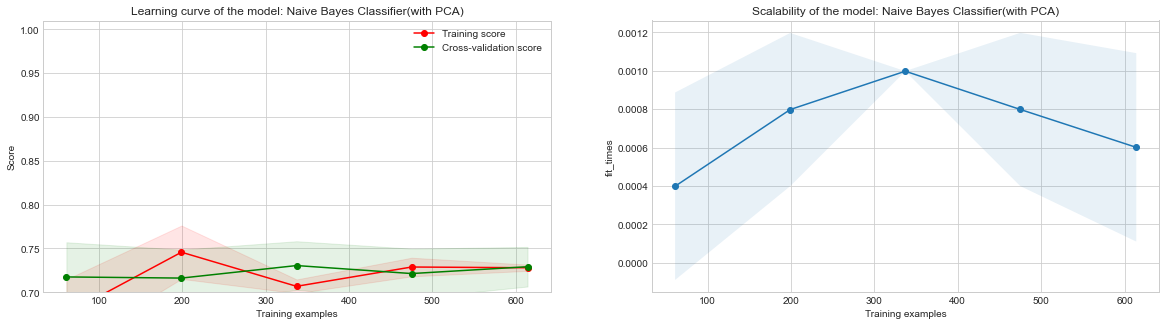

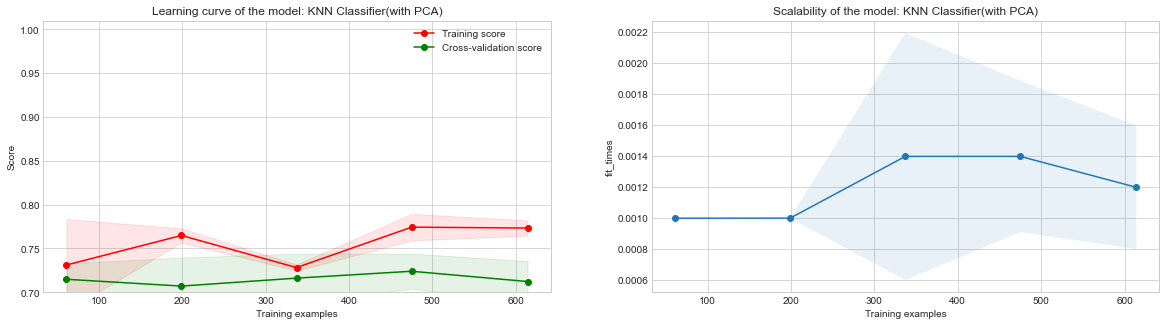

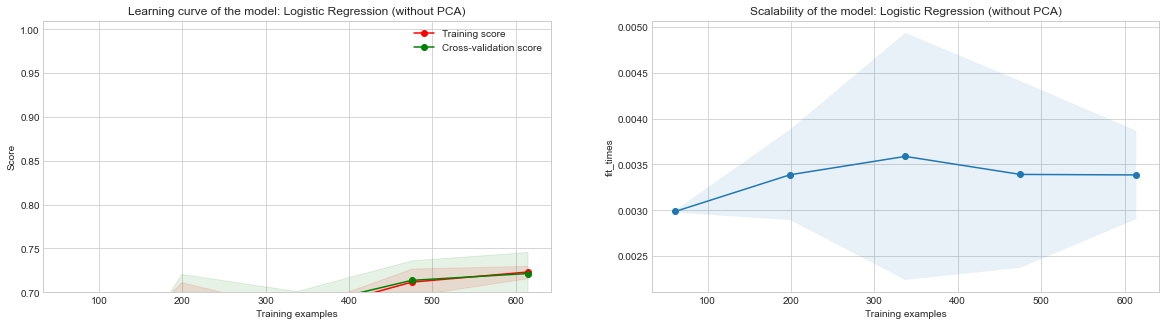

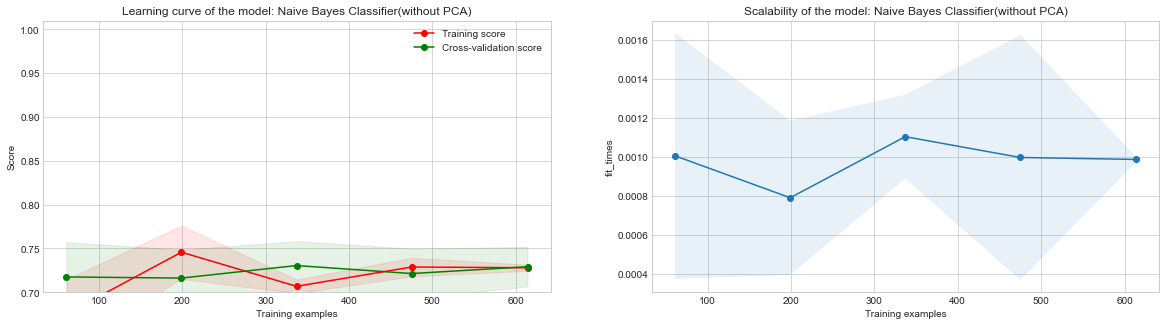

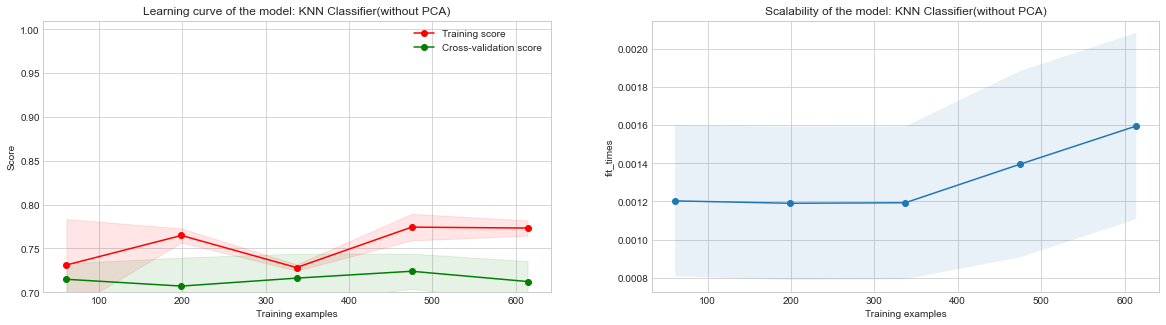

In [46]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    axes[0].set_title("Learning curve of the model: {}".format(title))
    axes[0].grid()

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model: {}".format(title))
    axes[1].grid()
    return plt

for name, model in classifiers1:
    plot_learning_curve(model, name, X, y, axes=None, ylim=(0.7, 1.01),cv=5, n_jobs=-1)

for name, model in classifiers2:
    plot_learning_curve(model, name, X, y, axes=None, ylim=(0.7, 1.01),cv=5, n_jobs=-1)

PCA computation does not make much of a difference here since we are dealing with small datasets.<br>
KNN classifier as usual overfits even with large number of neighbourhoods. <br>
Computational time is also a big factor in choosing a model apart from learning curve.<br>
Optimal computational time between 200-400 datapoints.